In [1]:
import numpy as np
import os

import keras,os
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras import activations

In [3]:
from tensorflow.keras import regularizers

In [4]:
x_train = []
y_train = []
x_test = []
y_test = []

In [5]:
dir = 'C:\\Users\\Dear\\Desktop\\FYP\\Testcode3-HOG\\HOG-master\\resized_images\\'
os.listdir(dir)

['test_set', 'training_set']

In [17]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm == 0: 
        return v
    return v / norm

In [6]:
import matplotlib.pyplot as plt

In [7]:
train_path = os.path.join(dir,os.listdir(dir)[1])

for i, j in enumerate(os.listdir(train_path)):
    class_path = os.path.join(train_path,j)
    for arr in os.listdir(class_path):
        nparr=plt.imread(os.path.join(class_path,arr))
        x_train.append(nparr)
        y_train.append(i)

In [8]:
x_train = np.array(x_train)

In [9]:
y_train = np.array(y_train)

In [10]:
test_path = os.path.join(dir,os.listdir(dir)[0])

for i, j in enumerate(os.listdir(test_path)):
    class_path = os.path.join(test_path,j)
    for arr in os.listdir(class_path):
        nparr=plt.imread(os.path.join(class_path,arr))
        x_test.append(nparr)
        y_test.append(i)

In [11]:
x_test = np.array(x_test)

In [12]:
y_test = np.array(y_test)

In [13]:
import tensorflow as tf
y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

In [14]:
from sklearn.utils import shuffle

In [15]:
x_train, y_train= shuffle(x_train, y_train, random_state=42)

In [16]:
x_test, y_test= shuffle(x_test, y_test, random_state=42)

In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(900, 32, 32, 3)
(900, 10)
(100, 32, 32, 3)
(100, 10)


In [18]:
num_classes=10

In [19]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding= 'same', input_shape= x_train.shape[1:]))
model1.add(layers.Activation(activations.relu))
model1.add(layers.BatchNormalization())
model1.add(Conv2D(32, (3, 3)))
model1.add(layers.Activation(activations.relu))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Dropout(0.25))

model1.add(Conv2D(64, (3, 3), padding= 'same'))
model1.add(layers.Activation(activations.relu))
model1.add(layers.BatchNormalization())
model1.add(Conv2D(64, (3, 3)))
model1.add(layers.Activation(activations.relu))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Dropout(0.25))

model1.add(Conv2D(128, (3, 3), padding= 'same'))
model1.add(layers.Activation(activations.relu))
model1.add(layers.BatchNormalization())
model1.add(Conv2D(128, (3, 3)))
model1.add(layers.Activation(activations.relu))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Flatten())
model1.add(layers.Dense(512, kernel_regularizer=regularizers.L2(0.01)))
model1.add(layers.Activation(activations.relu))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(num_classes))
model1.add(layers.Activation('softmax'))


In [20]:
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=0.001)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

c:\users\dear\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [21]:
input_shape = (None,32,32, 3)
model1.build(input_shape)

In [22]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper (ModuleWrappe (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0

In [23]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early_stop = EarlyStopping(monitor='val_loss',patience=2)
#x_tr=x_train.reshape(900,18,16,1)
#x_ts=x_test.reshape(100,18,16,1)

hist = model1.fit(x_train,y_train, validation_data=(x_test,y_test), validation_steps=10,epochs=30, callbacks=[early_stop])

Epoch 1/30
29/29 [==============================] - 18s 512ms/step - loss: 7.3583 - accuracy: 0.3433 - val_loss: 10.8669 - val_accuracy: 0.1800
Epoch 2/30
29/29 [==============================] - 12s 403ms/step - loss: 5.8528 - accuracy: 0.5844 - val_loss: 9.2351 - val_accuracy: 0.2200
Epoch 3/30
29/29 [==============================] - 10s 349ms/step - loss: 5.2778 - accuracy: 0.6378 - val_loss: 6.1302 - val_accuracy: 0.4300
Epoch 4/30
29/29 [==============================] - 13s 437ms/step - loss: 4.7866 - accuracy: 0.6733 - val_loss: 6.0368 - val_accuracy: 0.4400
Epoch 5/30
29/29 [==============================] - 10s 346ms/step - loss: 4.2242 - accuracy: 0.7122 - val_loss: 4.3121 - val_accuracy: 0.6400
Epoch 6/30
29/29 [==============================] - 13s 446ms/step - loss: 3.8644 - accuracy: 0.7367 - val_loss: 4.1254 - val_accuracy: 0.6500
Epoch 7/30
29/29 [==============================] - 14s 504ms/step - loss: 3.4901 - accuracy: 0.7556 - val_loss: 3.7139 - val_accuracy: 0.640

In [24]:
model1.evaluate(x_test
                ,y_test)

4/4 [==============================] - 1s 92ms/step - loss: 1.4812 - accuracy: 0.7700


[1.4812421798706055, 0.7699999809265137]

In [25]:
y_pred=model1.predict_classes(x_test)

c:\users\dear\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
y_pred

array([8, 5, 7, 4, 4, 5, 2, 8, 1, 7, 1, 3, 8, 8, 7, 0, 7, 7, 1, 3, 7, 8,
       2, 4, 6, 1, 4, 5, 0, 7, 8, 4, 8, 2, 7, 8, 6, 6, 0, 1, 4, 3, 0, 6,
       2, 1, 8, 2, 6, 1, 2, 0, 1, 8, 8, 7, 4, 6, 8, 8, 5, 5, 5, 4, 5, 6,
       4, 6, 6, 9, 7, 4, 4, 4, 9, 5, 7, 3, 9, 5, 6, 8, 3, 2, 7, 0, 2, 8,
       2, 8, 9, 7, 8, 8, 2, 6, 8, 1, 7, 5], dtype=int64)

In [27]:
testttt=np.argmax(y_test,axis=-1)
testttt

array([8, 5, 7, 4, 4, 3, 2, 8, 1, 0, 1, 3, 7, 3, 9, 0, 7, 7, 1, 3, 5, 8,
       2, 4, 6, 1, 4, 9, 0, 7, 1, 4, 8, 2, 9, 0, 6, 6, 3, 1, 4, 3, 0, 9,
       2, 1, 8, 2, 6, 1, 2, 0, 1, 3, 0, 7, 0, 6, 3, 8, 5, 9, 5, 4, 5, 6,
       4, 6, 6, 9, 7, 4, 5, 4, 9, 5, 7, 3, 9, 5, 6, 8, 3, 2, 0, 5, 2, 0,
       2, 8, 9, 7, 8, 8, 2, 6, 7, 1, 9, 5], dtype=int64)

In [28]:
y_pred_enc = tf.keras.utils.to_categorical(y_pred,10)

In [29]:
import sklearn
from sklearn.model_selection import train_test_split
print(sklearn.metrics.classification_report(y_test,y_pred_enc))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       1.00      0.90      0.95        10
           2       1.00      1.00      1.00        10
           3       1.00      0.50      0.67        10
           4       0.83      1.00      0.91        10
           5       0.70      0.70      0.70        10
           6       0.91      1.00      0.95        10
           7       0.57      0.80      0.67        10
           8       0.53      1.00      0.69        10
           9       1.00      0.40      0.57        10

   micro avg       0.77      0.77      0.77       100
   macro avg       0.82      0.77      0.76       100
weighted avg       0.82      0.77      0.76       100
 samples avg       0.77      0.77      0.77       100



In [30]:
#train accuracy
accuracy = model1.evaluate(x_train, y_train)

29/29 [==============================] - 3s 117ms/step - loss: 0.5283 - accuracy: 0.9389


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
#test accuracy 
y_pred = (model1.predict(x_test) > 0.5).astype("int32")
y_pred
accuracy_score(y_test, y_pred)

0.71

In [43]:
import matplotlib
import matplotlib.pyplot 

In [46]:
classes = ['beaches','bus', 'dinosaurs', 'elephants', 'flowers', 'foods','horses', 'monuments', 'mountains_and_snow', 'people_and_villages_in_Africa']

In [57]:
y_test[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [76]:
def plot_sample(x,y,index):
    plt.figure(figsize = (32,2))
    plt.imshow(x_test[index])
    plt.xlabel(classes[index])


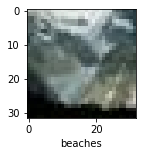

In [79]:
plot_sample(x_test,y_test,0)

In [88]:
classes[plot_sample]

TypeError: list indices must be integers or slices, not function

In [72]:
y_pred = model1.predict(x_test)
cnn_y_pred_classes = [np.argmax(element) for element in y_pred]
cnn_y_pred_classes[:100]

[8,
 5,
 7,
 4,
 4,
 5,
 2,
 8,
 1,
 7,
 1,
 3,
 8,
 8,
 7,
 0,
 7,
 7,
 1,
 3,
 7,
 8,
 2,
 4,
 6,
 1,
 4,
 5,
 0,
 7,
 8,
 4,
 8,
 2,
 7,
 8,
 6,
 6,
 0,
 1,
 4,
 3,
 0,
 6,
 2,
 1,
 8,
 2,
 6,
 1,
 2,
 0,
 1,
 8,
 8,
 7,
 4,
 6,
 8,
 8,
 5,
 5,
 5,
 4,
 5,
 6,
 4,
 6,
 6,
 9,
 7,
 4,
 4,
 4,
 9,
 5,
 7,
 3,
 9,
 5,
 6,
 8,
 3,
 2,
 7,
 0,
 2,
 8,
 2,
 8,
 9,
 7,
 8,
 8,
 2,
 6,
 8,
 1,
 7,
 5]

In [83]:
classes[cnn_y_pred_classes[15]]

'beaches'